<a href="https://colab.research.google.com/github/yohanesnuwara/2016-ml-contest/blob/master/isotropy_anisotropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Isotropic

In [ ]:
Vp = 2000 # m/s
Vs = 1000
rho = 2000 # kg/m3

C33 = (rho * (Vp)**2) * (1E-09) # GPa
C44 = (rho * (Vs)**2) * (1E-09) # GPa

C11 = C33
C12 = C33 - 2 * C44
C13 = C33 - 2 * C44
C22 = C33
C23 = C33 - 2 * C44
C55 = C66 = C44
C_matrix = np.array([[C11,  C12,  C13,    0,    0,    0],
                     [0,    C22,  C23,    0,    0,    0],
                     [0,    0,    C33,    0,    0,    0],
                     [0,    0,      0,  C44,    0,    0],
                     [0,    0,      0,    0,  C55,    0],
                     [0,    0,      0,    0,    0,  C66]])
C_inv = np.linalg.inv(C_matrix)
print('C33:', C33, 'GPa, and C44:', C44, 'GPa \n')
print('Isotropic elastic stiffness tensor:')
print(C_matrix, '\n')
print('Compliance tensor (in GPa):')
print(C_inv)

C33: 8.0 GPa, and C44: 2.0 GPa 

Isotropic elastic stiffness tensor:
[[8. 4. 4. 0. 0. 0.]
 [0. 8. 4. 0. 0. 0.]
 [0. 0. 8. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2.]] 

Compliance tensor (in GPa):
[[ 0.125   -0.0625  -0.03125  0.       0.       0.     ]
 [ 0.       0.125   -0.0625   0.       0.       0.     ]
 [ 0.       0.       0.125    0.       0.       0.     ]
 [ 0.       0.       0.       0.5      0.       0.     ]
 [ 0.       0.       0.       0.       0.5      0.     ]
 [ 0.       0.       0.       0.       0.       0.5    ]]


In [ ]:
sigma_xx = 5000
sigma_yy = 15000
sigma_zz = 10000
stress_matrix = np.array([[sigma_xx],
                          [sigma_yy],
                          [sigma_zz],
                          [0],
                          [0],
                          [0]])
strain_matrix = np.dot((C_inv / 145000), stress_matrix)
strain_matrix

array([[-0.00431034],
       [ 0.00862069],
       [ 0.00862069],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

# Anisotropy Type VTI (Vertical Transverse Isotropy)

## Backus Average (1962)

### Direct rotation of a bedding plane

6x6 stiffness matrix from Backus averaging of a dolomite-shale interbedding (0.75 m thickness dolomite and 0.5 m thickness shale)

In [ ]:
A = 45.1
C = 34.03 
D = 8.28
M = 12.55 
F = 16.7
B = A - 2 * M

# stiffness tensor
S = np.array([[A, B, F, 0, 0, 0],
              [B, A, F, 0, 0, 0],
              [F, F, C, 0, 0, 0],
              [0, 0, 0, D, 0, 0],
              [0, 0, 0, 0, D, 0],
              [0, 0, 0, 0, 0, M]])
print('Stiffness tensor:')
print(S, '\n')

Stiffness tensor:
[[45.1  20.   16.7   0.    0.    0.  ]
 [20.   45.1  16.7   0.    0.    0.  ]
 [16.7  16.7  34.03  0.    0.    0.  ]
 [ 0.    0.    0.    8.28  0.    0.  ]
 [ 0.    0.    0.    0.    8.28  0.  ]
 [ 0.    0.    0.    0.    0.   12.55]] 



Assuming the interbedding dolomite-shale has N160°E strike and 45° dip 

In [ ]:
" Strike and dip data "

strike = 160 # azimuth from north
dip = 45

This is a TTI (tilted transverse isotropy) type of anisotropy. The above Backus is computed on a **tilted coordinate with z-axis normal to bedding plane**, in other words the stiffness matrix behaves as a **vertical transverse isotropy (VTI) in a tilted coordinate**. 

So, we can rotate the **tilted coordinate** to a **global coordinate**.

![rotation matrix](https://user-images.githubusercontent.com/51282928/78970364-56ead300-7b33-11ea-926b-41b889275577.PNG)

There are two steps of transformation:

* Step 1: Rotate the bedding plane by the strike angle `strike = theta` to the global y axis, along z axis
* Step 2: Rotate the bedding plane by the strike angle `dip = psi` to the global z axis, along x axis

#### First rotation of strike

In [ ]:
" direction cosines of rotation along Z axis (rotate strike) "

theta = strike # transformation angle

a1 = np.cos(np.deg2rad(theta)); a2 = -np.sin(np.deg2rad(theta)); a3 = 0
b1 = np.sin(np.deg2rad(theta)); b2 = np.cos(np.deg2rad(theta)); b3 = 0
c1 = 0; c2 = 0; c3 = 1

Z = np.array([[a1, a2, a3],
              [b1, b2, b3],
              [c1, c2, c3]])
print('Direction cosine matrix after rotation of strike:')
print(Z, '\n')

Direction cosine matrix after rotation of strike:
[[-0.93969262 -0.34202014  0.        ]
 [ 0.34202014 -0.93969262  0.        ]
 [ 0.          0.          1.        ]] 



#### Second rotation of dip

In [ ]:
" direction cosines of rotation along X axis (rotate dip) "

psi = dip # transformation angle

d1 = 1; d2 = 0; d3 = 0
e1 = 0; e2 = np.cos(np.deg2rad(psi)); e3 = -np.sin(np.deg2rad(psi))
f1 = 0; f2 = np.sin(np.deg2rad(psi)); f3 = np.cos(np.deg2rad(psi))

X = np.array([[d1, d2, d3],
              [e1, e2, e3],
              [f1, f2, f3]])
print('Direction cosine matrix after rotation of dip:')
print(X, '\n')

Direction cosine matrix after rotation of dip:
[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]] 



#### Combined rotation

In [ ]:
" direction cosine of rotation combination of strike and dip "

# multiply direction cosine matrix of 1st and 2nd rotation
L = np.dot(X, Z)
print('Direction cosine matrix after rotation combination:')
print(L, '\n')

Direction cosine matrix after rotation combination:
[[-0.93969262 -0.34202014  0.        ]
 [ 0.24184476 -0.66446302 -0.70710678]
 [ 0.24184476 -0.66446302  0.70710678]] 



#### Create 6x6 rotation/transformation tensor

In [ ]:
" direction cosine elements "

l1 = L[0][0]; l2 = L[0][1]; l3 = L[0][2]
m1 = L[1][0]; m2 = L[1][1]; m3 = L[1][2]
n1 = L[2][0]; n2 = L[2][1]; n3 = L[2][2]

" rotation tensor "

Y = np.array([[l1**2,   m1**2,   n1**2,   2*m1*n1,        2*n1*l1,        2*l1*m1],
              [l2**2,   m2**2,   n2**2,   2*m2*n2,        2*n2*l2,        2*l2*m2],
              [l3**2,   m3**2,   n3**2,   2*m3*n3,        2*n3*l3,        2*l3*m3],
              [l2*l3,   m2*m3,   n2*n3,   m2*n3 + m3*n2,  n2*l3 + n3*l2,  m2*l3 + m3*l2],
              [l3*l1,   m3*m1,   n3*n1,   m3*n1 + m1*n3,  n3*l1 + n1*l3,  m3*l1 + m1*l3],
              [l1*l2,   m1*m2,   n1*n2,   m1*n2 + m2*n1,  n1*l2 + n2*l1,  m1*l2 + m2*l1]])
print('Rotation tensor:')
print(Y, '\n')

Rotation tensor:
[[ 8.83022222e-01  5.84888892e-02  5.84888892e-02  1.16977778e-01
  -4.54519478e-01 -4.54519478e-01]
 [ 1.16977778e-01  4.41511111e-01  4.41511111e-01  8.83022222e-01
   4.54519478e-01  4.54519478e-01]
 [ 0.00000000e+00  5.00000000e-01  5.00000000e-01 -1.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  4.69846310e-01 -4.69846310e-01 -1.66533454e-16
  -2.41844763e-01  2.41844763e-01]
 [-0.00000000e+00 -1.71010072e-01  1.71010072e-01  5.55111512e-17
  -6.64463024e-01  6.64463024e-01]
 [ 3.21393805e-01 -1.60696902e-01 -1.60696902e-01 -3.21393805e-01
   5.41675220e-01  5.41675220e-01]] 



Transformation of the original stiffness tensor to the new coordinate

In [ ]:
" transformation of stiffness "

Y_inv = np.linalg.inv(Y)
S_dot = np.dot(Y, S)
S_trans = np.dot(S_dot, Y_inv)
print('Transformed stiffness tensor:')
print(S_trans, '\n')

Transformed stiffness tensor:
[[41.54985679 20.39961075 19.01004711  2.87729203 -2.50767467  9.00794099]
 [20.39961075 31.7234217  23.33245289  5.42489228 -0.5140733  -0.76258293]
 [19.01004711 23.33245289 32.2725      5.20119866 -1.89308149 -3.62692909]
 [ 1.43864601  2.71244614  2.60059933 21.40862666 -4.00135287 -0.11561983]
 [-1.25383733 -0.25703665 -0.94654075 -4.00135287 11.87137334  1.78255012]
 [ 4.5039705  -0.38129146 -1.81346454 -0.11561983  1.78255012 14.51422151]] 



#### Compliance tensor

In [ ]:
" compliance tensor, inverse of stiffness tensor "

# original compliance tensor
compliance_original = np.linalg.inv(S)
print('Original compliance tensor:')
print(compliance_original, '\n')

# transformed compliance tensor
compliance_trans = np.linalg.inv(S_trans)
print('Transformed compliance tensor:')
print(compliance_trans, '\n')

Original compliance tensor:
[[ 0.03018533 -0.00965531 -0.01007497  0.          0.          0.        ]
 [-0.00965531  0.03018533 -0.01007497  0.          0.          0.        ]
 [-0.01007497 -0.01007497  0.03927429  0.          0.          0.        ]
 [ 0.          0.          0.          0.12077295  0.          0.        ]
 [ 0.          0.          0.          0.          0.12077295  0.        ]
 [ 0.          0.          0.          0.          0.          0.07968127]] 

Transformed compliance tensor:
[[ 0.04319905 -0.01790397 -0.01433298  0.0043656   0.01246523 -0.03282901]
 [-0.01790397  0.07577782 -0.04359122 -0.00824167 -0.01105446  0.00549218]
 [-0.01433298 -0.04359122  0.07271389 -0.00427042  0.0015543   0.02455057]
 [ 0.0021828  -0.00412083 -0.00213521  0.05128796  0.01781239 -0.00388384]
 [ 0.00623261 -0.00552723  0.00077715  0.01781239  0.09374393 -0.01533552]
 [-0.01641451  0.00274609  0.01227529 -0.00388384 -0.01533552  0.08414946]] 



Young's Moduli from compliance tensor

In [ ]:
" Before rotation (VTI)"

# Young's modulus in all directions
Ex_0 = 1 / compliance_original[0][0]
Ey_0 = 1 / compliance_original[1][1]
Ez_0 = 1 / compliance_original[2][2]
print('Before rotation:')
print('Young modulus in x direction before rotation', Ex_0, 'GPa')
print('Young modulus in y direction before rotation', Ey_0, 'GPa')
print('Young modulus in z direction before rotation', Ez_0, 'GPa \n')

" After rotation (TTI)"

# Young's modulus in all directions
Ex_1 = 1 / compliance_trans[0][0]
Ey_1 = 1 / compliance_trans[1][1]
Ez_1 = 1 / compliance_trans[2][2]
print('After rotation:')
print('Young modulus in x direction after rotation', Ex_1, 'GPa')
print('Young modulus in y direction after rotation', Ey_1, 'GPa')
print('Young modulus in z direction after rotation', Ez_1, 'GPa')

Before rotation:
Young modulus in x direction before rotation 33.12867908362616 GPa
Young modulus in y direction before rotation 33.12867908362616 GPa
Young modulus in z direction before rotation 25.461950844854073 GPa 

After rotation:
Young modulus in x direction after rotation 23.148657858516483 GPa
Young modulus in y direction after rotation 13.196473643023813 GPa
Young modulus in z direction after rotation 13.752530323619581 GPa


Shear Moduli from compliance tensor

In [ ]:
" Before rotation (VTI)"

# Shear modulus in all directions
Gyz_0 = 1 / compliance_original[3][3]
Gxz_0 = 1 / compliance_original[4][4]
Gxy_0 = 1 / compliance_original[5][5]
print('Before rotation:')
print('Shear modulus in yz plane before rotation', Gyz_0, 'GPa')
print('Shear modulus in xz plane before rotation', Gxz_0, 'GPa')
print('Shear modulus in xy plane before rotation', Gxy_0, 'GPa \n')

" After rotation (TTI)"

# Shear modulus in all directions
Gyz_1 = 1 / compliance_trans[3][3]
Gxz_1 = 1 / compliance_trans[4][4]
Gxy_1 = 1 / compliance_trans[5][5]
print('After rotation:')
print('Shear modulus in yz plane after rotation', Gyz_1, 'GPa')
print('Shear modulus in xz plane after rotation', Gxz_1, 'GPa')
print('Shear modulus in xy plane after rotation', Gxy_1, 'GPa')

Before rotation:
Shear modulus in yz plane before rotation 8.28 GPa
Shear modulus in xz plane before rotation 8.28 GPa
Shear modulus in xy plane before rotation 12.55 GPa 

After rotation:
Shear modulus in yz plane after rotation 19.497753513298168 GPa
Shear modulus in xz plane after rotation 10.667357391316818 GPa
Shear modulus in xy plane after rotation 11.883617447563896 GPa


Coefficient of strain in $i$ direction caused by shear stress in $jk$ plane ($\eta_{i,jk}$)

In [ ]:
" Before rotation (VTI)"

# Eta modulus in all directions
eta_x_yz_0 = compliance_original[0][3] * Gyz_0
eta_x_xz_0 = compliance_original[0][4] * Gxz_0
eta_x_xy_0 = compliance_original[0][5] * Gxy_0
eta_y_yz_0 = compliance_original[1][3] * Gyz_0
eta_y_xz_0 = compliance_original[1][4] * Gxz_0
eta_y_xy_0 = compliance_original[1][5] * Gxy_0
eta_z_yz_0 = compliance_original[2][3] * Gyz_0
eta_z_xz_0 = compliance_original[2][4] * Gxz_0
eta_z_xy_0 = compliance_original[2][5] * Gxy_0

print('Before rotation:')
print('Coefficient of strain in x direction caused by shear stress in yz plane:', eta_x_yz_0, 'GPa')
print('Coefficient of strain in x direction caused by shear stress in xz plane:', eta_x_xz_0, 'GPa')
print('Coefficient of strain in x direction caused by shear stress in xy plane:', eta_x_xy_0, 'GPa')
print('Coefficient of strain in y direction caused by shear stress in yz plane:', eta_y_yz_0, 'GPa')
print('Coefficient of strain in y direction caused by shear stress in xz plane:', eta_y_xz_0, 'GPa')
print('Coefficient of strain in y direction caused by shear stress in xy plane:', eta_y_xy_0, 'GPa')
print('Coefficient of strain in z direction caused by shear stress in yz plane:', eta_z_yz_0, 'GPa')
print('Coefficient of strain in z direction caused by shear stress in xz plane:', eta_z_xz_0, 'GPa')
print('Coefficient of strain in z direction caused by shear stress in xy plane:', eta_z_xy_0, 'GPa \n')

" After rotation (TTI)"

# Eta modulus in all directions
eta_x_yz_1 = compliance_trans[0][3] * Gyz_0
eta_x_xz_1 = compliance_trans[0][4] * Gxz_1
eta_x_xy_1 = compliance_trans[0][5] * Gxy_1
eta_y_yz_1 = compliance_trans[1][3] * Gyz_1
eta_y_xz_1 = compliance_trans[1][4] * Gxz_1
eta_y_xy_1 = compliance_trans[1][5] * Gxy_1
eta_z_yz_1 = compliance_trans[2][3] * Gyz_1
eta_z_xz_1 = compliance_trans[2][4] * Gxz_1
eta_z_xy_1 = compliance_trans[2][5] * Gxy_1

print('After rotation:')
print('Coefficient of strain in x direction caused by shear stress in yz plane:', eta_x_yz_1, 'GPa')
print('Coefficient of strain in x direction caused by shear stress in xz plane:', eta_x_xz_1, 'GPa')
print('Coefficient of strain in x direction caused by shear stress in xy plane:', eta_x_xy_1, 'GPa')
print('Coefficient of strain in y direction caused by shear stress in yz plane:', eta_y_yz_1, 'GPa')
print('Coefficient of strain in y direction caused by shear stress in xz plane:', eta_y_xz_1, 'GPa')
print('Coefficient of strain in y direction caused by shear stress in xy plane:', eta_y_xy_1, 'GPa')
print('Coefficient of strain in z direction caused by shear stress in yz plane:', eta_z_yz_1, 'GPa')
print('Coefficient of strain in z direction caused by shear stress in xz plane:', eta_z_xz_1, 'GPa')
print('Coefficient of strain in z direction caused by shear stress in xy plane:', eta_z_xy_1, 'GPa')

Before rotation:
Coefficient of strain in x direction caused by shear stress in yz plane: 0.0 GPa
Coefficient of strain in x direction caused by shear stress in xz plane: 0.0 GPa
Coefficient of strain in x direction caused by shear stress in xy plane: 0.0 GPa
Coefficient of strain in y direction caused by shear stress in yz plane: 0.0 GPa
Coefficient of strain in y direction caused by shear stress in xz plane: 0.0 GPa
Coefficient of strain in y direction caused by shear stress in xy plane: 0.0 GPa
Coefficient of strain in z direction caused by shear stress in yz plane: 0.0 GPa
Coefficient of strain in z direction caused by shear stress in xz plane: 0.0 GPa
Coefficient of strain in z direction caused by shear stress in xy plane: 0.0 GPa 

After rotation:
Coefficient of strain in x direction caused by shear stress in yz plane: 0.03614719976435066 GPa
Coefficient of strain in x direction caused by shear stress in xz plane: 0.1329710599835882 GPa
Coefficient of strain in x direction caused

Coefficient of displacement in $ij$ plane caused by normal stress in $k$ direction ($\eta_{ij,k}$)

In [ ]:
" Before rotation (VTI)"

# Eta modulus in all directions
eta_yz_x_0 = compliance_original[3][0] * Ex_0
eta_xz_x_0 = compliance_original[4][0] * Ex_0
eta_xy_x_0 = compliance_original[5][0] * Ex_0
eta_yz_y_0 = compliance_original[3][1] * Ey_0
eta_xz_y_0 = compliance_original[4][1] * Ey_0
eta_xy_y_0 = compliance_original[5][1] * Ey_0
eta_yz_z_0 = compliance_original[3][2] * Ez_0
eta_xz_z_0 = compliance_original[4][2] * Ez_0
eta_xy_z_0 = compliance_original[5][2] * Ez_0

print('Before rotation:')
print('Coefficient of strain in yz plane caused by shear stress in x direction:', eta_yz_x_0, 'GPa')
print('Coefficient of strain in xz plane caused by shear stress in x direction:', eta_xz_x_0, 'GPa')
print('Coefficient of strain in xy plane caused by shear stress in x direction:', eta_xy_x_0, 'GPa')
print('Coefficient of strain in yz plane caused by shear stress in y direction:', eta_yz_y_0, 'GPa')
print('Coefficient of strain in xz plane caused by shear stress in y direction:', eta_xz_y_0, 'GPa')
print('Coefficient of strain in xy plane caused by shear stress in y direction:', eta_xy_y_0, 'GPa')
print('Coefficient of strain in yz plane caused by shear stress in z direction:', eta_yz_z_0, 'GPa')
print('Coefficient of strain in xz plane caused by shear stress in z direction:', eta_xz_z_0, 'GPa')
print('Coefficient of strain in xy plane caused by shear stress in z direction:', eta_xy_z_0, 'GPa \n')

" After rotation (TTI)"

# Eta modulus in all directions
eta_yz_x_1 = compliance_trans[3][0] * Ex_1
eta_xz_x_1 = compliance_trans[4][0] * Ex_1
eta_xy_x_1 = compliance_trans[5][0] * Ex_1
eta_yz_y_1 = compliance_trans[3][1] * Ey_1
eta_xz_y_1 = compliance_trans[4][1] * Ey_1
eta_xy_y_1 = compliance_trans[5][1] * Ey_1
eta_yz_z_1 = compliance_trans[3][2] * Ez_1
eta_xz_z_1 = compliance_trans[4][2] * Ez_1
eta_xy_z_1 = compliance_trans[5][2] * Ez_1

print('After rotation:')
print('Coefficient of strain in yz plane caused by shear stress in x direction:', eta_yz_x_1, 'GPa')
print('Coefficient of strain in xz plane caused by shear stress in x direction:', eta_xz_x_1, 'GPa')
print('Coefficient of strain in xy plane caused by shear stress in x direction:', eta_xy_x_1, 'GPa')
print('Coefficient of strain in yz plane caused by shear stress in y direction:', eta_yz_y_1, 'GPa')
print('Coefficient of strain in xz plane caused by shear stress in y direction:', eta_xz_y_1, 'GPa')
print('Coefficient of strain in xy plane caused by shear stress in y direction:', eta_xy_y_1, 'GPa')
print('Coefficient of strain in yz plane caused by shear stress in z direction:', eta_yz_z_1, 'GPa')
print('Coefficient of strain in xz plane caused by shear stress in z direction:', eta_xz_z_1, 'GPa')
print('Coefficient of strain in xy plane caused by shear stress in z direction:', eta_xy_z_1, 'GPa \n')

Before rotation:
Coefficient of strain in yz plane caused by shear stress in x direction: 0.0 GPa
Coefficient of strain in xz plane caused by shear stress in x direction: 0.0 GPa
Coefficient of strain in xy plane caused by shear stress in x direction: 0.0 GPa
Coefficient of strain in yz plane caused by shear stress in y direction: 0.0 GPa
Coefficient of strain in xz plane caused by shear stress in y direction: 0.0 GPa
Coefficient of strain in xy plane caused by shear stress in y direction: 0.0 GPa
Coefficient of strain in yz plane caused by shear stress in z direction: 0.0 GPa
Coefficient of strain in xz plane caused by shear stress in z direction: 0.0 GPa
Coefficient of strain in xy plane caused by shear stress in z direction: 0.0 GPa 

After rotation:
Coefficient of strain in yz plane caused by shear stress in x direction: 0.050528934775869686 GPa
Coefficient of strain in xz plane caused by shear stress in x direction: 0.1442766685191366 GPa
Coefficient of strain in xy plane caused b

Coefficient of displacement in $ij$ plane caused by tangential stress in $kl$ direction ($\mu_{ij,kl}$)

In [ ]:
" Before rotation (VTI)"

# Mu modulus in all directions
eta_yz_xz_0 = compliance_original[3][4] * Gxz_0
eta_yz_xy_0 = compliance_original[3][5] * Gxy_0
eta_xz_yz_0 = compliance_original[4][3] * Gyz_0
eta_xz_xy_0 = compliance_original[4][5] * Gxy_0
eta_xy_yz_0 = compliance_original[5][3] * Gyz_0
eta_xy_xz_0 = compliance_original[5][4] * Gxz_0

print('Before rotation:')
print('Coefficient of strain in yz plane caused by tangential stress in xz plane:', eta_yz_xz_0, 'GPa')
print('Coefficient of strain in yz plane caused by tangential stress in xy plane:', eta_yz_xy_0, 'GPa')
print('Coefficient of strain in xz plane caused by tangential stress in yz plane:', eta_xz_yz_0, 'GPa')
print('Coefficient of strain in xz plane caused by tangential stress in xy plane:', eta_xz_xy_0, 'GPa')
print('Coefficient of strain in xy plane caused by tangential stress in yz plane:', eta_xy_yz_0, 'GPa')
print('Coefficient of strain in xy plane caused by tangential stress in xz plane:', eta_xy_xz_0, 'GPa \n')

" After rotation (TTI)"

# Mu modulus in all directions

eta_yz_xz_1 = compliance_trans[3][4] * Gxz_1
eta_yz_xy_1 = compliance_trans[3][5] * Gxy_1
eta_xz_yz_1 = compliance_trans[4][3] * Gyz_1
eta_xz_xy_1 = compliance_trans[4][5] * Gxy_1
eta_xy_yz_1 = compliance_trans[5][3] * Gyz_1
eta_xy_xz_1 = compliance_trans[5][4] * Gxz_1

print('After rotation:')
print('Coefficient of strain in yz plane caused by tangential stress in xz plane:', eta_yz_xz_1, 'GPa')
print('Coefficient of strain in yz plane caused by tangential stress in xy plane:', eta_yz_xy_1, 'GPa')
print('Coefficient of strain in xz plane caused by tangential stress in yz plane:', eta_xz_yz_1, 'GPa')
print('Coefficient of strain in xz plane caused by tangential stress in xy plane:', eta_xz_xy_1, 'GPa')
print('Coefficient of strain in xy plane caused by tangential stress in yz plane:', eta_xy_yz_1, 'GPa')
print('Coefficient of strain in xy plane caused by tangential stress in xz plane:', eta_xy_xz_1, 'GPa')

Before rotation:
Coefficient of strain in yz plane caused by tangential stress in xz plane: 0.0 GPa
Coefficient of strain in yz plane caused by tangential stress in xy plane: 0.0 GPa
Coefficient of strain in xz plane caused by tangential stress in yz plane: 0.0 GPa
Coefficient of strain in xz plane caused by tangential stress in xy plane: 0.0 GPa
Coefficient of strain in xy plane caused by tangential stress in yz plane: 0.0 GPa
Coefficient of strain in xy plane caused by tangential stress in xz plane: 0.0 GPa 

After rotation:
Coefficient of strain in yz plane caused by tangential stress in xz plane: 0.19001117549389046 GPa
Coefficient of strain in yz plane caused by tangential stress in xy plane: -0.04615402032652601 GPa
Coefficient of strain in xz plane caused by tangential stress in yz plane: 0.3473016726305247 GPa
Coefficient of strain in xz plane caused by tangential stress in xy plane: -0.18224143258919023 GPa
Coefficient of strain in xy plane caused by tangential stress in yz pl

Poisson's ratio $\nu_{ij}$ (ratio of shear strain in $j$ direction to shear strain in $i$ direction given external force in $i$ direction)

In [ ]:
" Before rotation (VTI)"

# Poisson's ratio in all directions
poisson_yx_0 = -compliance_original[0][1] * Ey_0
poisson_zx_0 = -compliance_original[0][2] * Ez_0
poisson_xy_0 = -compliance_original[1][0] * Ex_0
poisson_zy_0 = -compliance_original[1][2] * Ez_0
poisson_xz_0 = -compliance_original[2][0] * Ex_0
poisson_yz_0 = -compliance_original[2][1] * Ey_0

print('Before rotation:')
print('Ratio of shear strain in x direction to shear strain in y direction given ext force in y direction:', poisson_yx_0, 'GPa')
print('Ratio of shear strain in x direction to shear strain in z direction given ext force in z direction:', poisson_zx_0, 'GPa')
print('Ratio of shear strain in y direction to shear strain in x direction given ext force in x direction:', poisson_xy_0, 'GPa')
print('Ratio of shear strain in y direction to shear strain in z direction given ext force in z direction:', poisson_zy_0, 'GPa')
print('Ratio of shear strain in z direction to shear strain in x direction given ext force in x direction:', poisson_xz_0, 'GPa')
print('Ratio of shear strain in z direction to shear strain in y direction given ext force in y direction:', poisson_yz_0, 'GPa \n')

" After rotation (TTI)"

# Poisson's ratio in all directions
poisson_yx_1 = -compliance_trans[0][1] * Ey_1
poisson_zx_1 = -compliance_trans[0][2] * Ez_1
poisson_xy_1 = -compliance_trans[1][0] * Ex_1
poisson_zy_1 = -compliance_trans[1][2] * Ez_1
poisson_xz_1 = -compliance_trans[2][0] * Ex_1
poisson_yz_1 = -compliance_trans[2][1] * Ey_1

print('After rotation:')
print('Ratio of shear strain in x direction to shear strain in y direction given ext force in y direction:', poisson_yx_1, 'GPa')
print('Ratio of shear strain in x direction to shear strain in z direction given ext force in z direction:', poisson_zx_1, 'GPa')
print('Ratio of shear strain in y direction to shear strain in x direction given ext force in x direction:', poisson_xy_1, 'GPa')
print('Ratio of shear strain in y direction to shear strain in z direction given ext force in z direction:', poisson_zy_1, 'GPa')
print('Ratio of shear strain in z direction to shear strain in x direction given ext force in x direction:', poisson_xz_1, 'GPa')
print('Ratio of shear strain in z direction to shear strain in y direction given ext force in y direction:', poisson_yz_1, 'GPa')

Before rotation:
Ratio of shear strain in x direction to shear strain in y direction given ext force in y direction: 0.3198676925747474 GPa
Ratio of shear strain in x direction to shear strain in z direction given ext force in z direction: 0.25652841781874036 GPa
Ratio of shear strain in y direction to shear strain in x direction given ext force in x direction: 0.3198676925747474 GPa
Ratio of shear strain in y direction to shear strain in z direction given ext force in z direction: 0.2565284178187404 GPa
Ratio of shear strain in z direction to shear strain in x direction given ext force in x direction: 0.3337704829268797 GPa
Ratio of shear strain in z direction to shear strain in y direction given ext force in y direction: 0.3337704829268798 GPa 

After rotation:
Ratio of shear strain in x direction to shear strain in y direction given ext force in y direction: 0.23626921525077396 GPa
Ratio of shear strain in x direction to shear strain in z direction given ext force in z direction: 0.

Applied stress ($\sigma_{xx}$, $\sigma_{yy}$, $\sigma_{zz}$, $\tau_{xy}$, $\tau_{yz}$, $\tau_{zx}$), calculate for strains ($\epsilon_{xx}$, $\epsilon_{yy}$, $\epsilon_{zz}$, $\gamma_{xy}$, $\gamma_{yz}$, $\gamma_{zx}$)

In [ ]:
# applied stresses
sigma_xx = 100 # MPa
sigma_yy = 100
sigma_zz = 100
tau_xy = 50
tau_yz = 50
tau_zx = 50

stress = np.array([[sigma_xx],
                   [sigma_yy],
                   [sigma_zz],
                   [tau_xy],
                   [tau_yz],
                   [tau_zx]])
print('Stress vector (MPa):')
print(stress, '\n')

# convert the compliance from 1/GPa to 1/MPa
compliance_new = compliance_trans * 1E-03

# strain is dot product of stress and compliance
strain = np.dot(compliance_new, stress)
print('Strain vector:')
print(strain, '\n')

print('Normal strain in x direction:', strain[0][0])
print('Normal strain in y direction:', strain[1][0])
print('Normal strain in z direction:', strain[2][0])
print('Shear strain in xy plane:', strain[3][0])
print('Shear strain in yz plane:', strain[4][0])
print('Shear strain in zx plane:', strain[5][0])

Stress vector (MPa):
[[100]
 [100]
 [100]
 [ 50]
 [ 50]
 [ 50]] 

Strain vector:
[[0.0002963 ]
 [0.00073807]
 [0.00257069]
 [0.0028535 ]
 [0.00495929]
 [0.00310719]] 

Normal strain in x direction: 0.0002963012076580393
Normal strain in y direction: 0.0007380665086672909
Normal strain in z direction: 0.0025706927402367225
Shear strain in xy plane: 0.0028535019810659898
Shear strain in yz plane: 0.004959294063347863
Shear strain in zx plane: 0.0031071923387636867


#### Full code

In [ ]:
A = 45.1
C = 34.03 
D = 8.28
M = 12.55 
F = 16.7
B = A - 2 * M

# stiffness tensor
S = np.array([[A, B, F, 0, 0, 0],
              [B, A, F, 0, 0, 0],
              [F, F, C, 0, 0, 0],
              [0, 0, 0, D, 0, 0],
              [0, 0, 0, 0, D, 0],
              [0, 0, 0, 0, 0, M]])
print('Stiffness tensor:')
print(S, '\n')

" Strike and dip data "

strike = 160 # azimuth from north
dip = 45
theta = strike 
psi = dip 

" direction cosines of rotation along Z axis (rotate strike) "

theta = strike # transformation angle

a1 = np.cos(np.deg2rad(theta)); a2 = -np.sin(np.deg2rad(theta)); a3 = 0
b1 = np.sin(np.deg2rad(theta)); b2 = np.cos(np.deg2rad(theta)); b3 = 0
c1 = 0; c2 = 0; c3 = 1

Z = np.array([[a1, a2, a3],
              [b1, b2, b3],
              [c1, c2, c3]])
print('Direction cosine matrix after rotation of strike:')
print(Z, '\n')

" direction cosines of rotation along X axis (rotate dip) "

psi = dip # transformation angle

d1 = 1; d2 = 0; d3 = 0
e1 = 0; e2 = np.cos(np.deg2rad(psi)); e3 = -np.sin(np.deg2rad(psi))
f1 = 0; f2 = np.sin(np.deg2rad(psi)); f3 = np.cos(np.deg2rad(psi))

X = np.array([[d1, d2, d3],
              [e1, e2, e3],
              [f1, f2, f3]])
print('Direction cosine matrix after rotation of dip:')
print(X, '\n')

" direction cosine of rotation combination of strike and dip "

L = np.dot(X, Z)
print('Direction cosine matrix after rotation combination:')
print(L, '\n')

" direction cosine elements "

l1 = L[0][0]; l2 = L[0][1]; l3 = L[0][2]
m1 = L[1][0]; m2 = L[1][1]; m3 = L[1][2]
n1 = L[2][0]; n2 = L[2][1]; n3 = L[2][2]

" rotation tensor "

Y = np.array([[l1**2,   m1**2,   n1**2,   2*m1*n1,        2*n1*l1,        2*l1*m1],
              [l2**2,   m2**2,   n2**2,   2*m2*n2,        2*n2*l2,        2*l2*m2],
              [l3**2,   m3**2,   n3**2,   2*m3*n3,        2*n3*l3,        2*l3*m3],
              [l2*l3,   m2*m3,   n2*n3,   m2*n3 + m3*n2,  n2*l3 + n3*l2,  m2*l3 + m3*l2],
              [l3*l1,   m3*m1,   n3*n1,   m3*n1 + m1*n3,  n3*l1 + n1*l3,  m3*l1 + m1*l3],
              [l1*l2,   m1*m2,   n1*n2,   m1*n2 + m2*n1,  n1*l2 + n2*l1,  m1*l2 + m2*l1]])
print('Rotation tensor:')
print(Y, '\n')

" transformation of stiffness "

Y_inv = np.linalg.inv(Y)
S_dot = np.dot(Y, S)
S_trans = np.dot(S_dot, Y_inv)
print('Transformed stiffness tensor:')
print(S_trans, '\n')

" compliance tensor, inverse of stiffness tensor "

# original compliance tensor
compliance_original = np.linalg.inv(S)
print('Original compliance tensor:')
print(compliance_original, '\n')

# transformed compliance tensor
compliance_trans = np.linalg.inv(S_trans)
print('Transformed compliance tensor:')
print(compliance_trans, '\n')

Stiffness tensor:
[[45.1  20.   16.7   0.    0.    0.  ]
 [20.   45.1  16.7   0.    0.    0.  ]
 [16.7  16.7  34.03  0.    0.    0.  ]
 [ 0.    0.    0.    8.28  0.    0.  ]
 [ 0.    0.    0.    0.    8.28  0.  ]
 [ 0.    0.    0.    0.    0.   12.55]] 

Direction cosine matrix after rotation of strike:
[[-0.93969262 -0.34202014  0.        ]
 [ 0.34202014 -0.93969262  0.        ]
 [ 0.          0.          1.        ]] 

Direction cosine matrix after rotation of dip:
[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]] 

Direction cosine matrix after rotation combination:
[[-0.93969262 -0.34202014  0.        ]
 [ 0.24184476 -0.66446302 -0.70710678]
 [ 0.24184476 -0.66446302  0.70710678]] 

Rotation tensor:
[[ 8.83022222e-01  5.84888892e-02  5.84888892e-02  1.16977778e-01
  -4.54519478e-01 -4.54519478e-01]
 [ 1.16977778e-01  4.41511111e-01  4.41511111e-01  8.83022222e-01
   4.54519478e-01  4.54519478e-01]
 [ 0.00000000e+00

### Rotation of stiffness matrix along X axis

![rotation matrix](https://user-images.githubusercontent.com/51282928/78970364-56ead300-7b33-11ea-926b-41b889275577.PNG)

In [ ]:
A = 45.1
C = 34.03 
D = 8.28
M = 12.55 
F = 16.7
B = A - 2 * M

# stiffness tensor
S = np.array([[A, B, F, 0, 0, 0],
              [B, A, F, 0, 0, 0],
              [F, F, C, 0, 0, 0],
              [0, 0, 0, D, 0, 0],
              [0, 0, 0, 0, D, 0],
              [0, 0, 0, 0, 0, M]])
print('Stiffness tensor:')
print(S, '\n')

# direction cosines of rotation along X axis
theta = 45 # transformation angle
l1 = 1; l2 = 0; l3 = 0
m1 = 0; m2 = np.cos(np.deg2rad(theta)); m3 = -np.sin(np.deg2rad(theta))
n1 = 0; n2 = np.sin(np.deg2rad(theta)); n3 = np.cos(np.deg2rad(theta))

X = np.array([[l1, l2, l3],
              [m1, m2, m3],
              [n1, n2, n3]])
print('Direction cosine matrix with angle', theta, ':')
print(X, '\n')

# rotation tensor
Y = np.array([[l1**2,   m1**2,   n1**2,   2*m1*n1,        2*n1*l1,        2*l1*m1],
              [l2**2,   m2**2,   n2**2,   2*m2*n2,        2*n2*l2,        2*l2*m2],
              [l3**2,   m3**2,   n3**2,   2*m3*n3,        2*n3*l3,        2*l3*m3],
              [l2*l3,   m2*m3,   n2*n3,   m2*n3 + m3*n2,  n2*l3 + n3*l2,  m2*l3 + m3*l2],
              [l3*l1,   m3*m1,   n3*n1,   m3*n1 + m1*n3,  n3*l1 + n1*l3,  m3*l1 + m1*l3],
              [l1*l2,   m1*m2,   n1*n2,   m1*n2 + m2*n1,  n1*l2 + n2*l1,  m1*l2 + m2*l1]])
print('Rotation tensor with angle', theta, ':')
print(Y, '\n')

# transformation of stiffness
Y_inv = np.linalg.inv(Y)
S_dot = np.dot(Y, S)
S_trans = np.dot(S_dot, Y_inv)
print('Transformed stiffness tensor with angle', theta, ':')
print(S_trans)

Stiffness tensor:
[[45.1  20.   16.7   0.    0.    0.  ]
 [20.   45.1  16.7   0.    0.    0.  ]
 [16.7  16.7  34.03  0.    0.    0.  ]
 [ 0.    0.    0.    8.28  0.    0.  ]
 [ 0.    0.    0.    0.    8.28  0.  ]
 [ 0.    0.    0.    0.    0.   12.55]] 

Direction cosine matrix with angle 45 :
[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]] 

Rotation tensor with angle 45 :
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e-01  5.00000000e-01  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e-01  5.00000000e-01 -1.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00 -5.00000000e-01  5.00000000e-01  2.22044605e-16
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.07106781e-01 -7.07106781e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+0

### Iteration to see how stiffness changes due to changing strikes and constant dips

(0.0, 175.0)

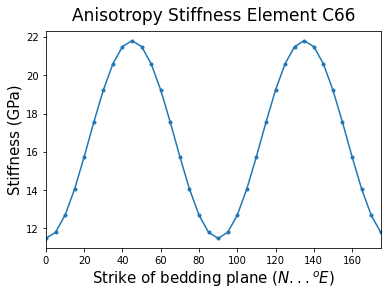

In [ ]:
A = 45.1
C = 34.03 
D = 8.28
M = 12.55 
F = 16.7
B = A - 2 * M

# stiffness tensor
S = np.array([[A, B, F, 0, 0, 0],
              [B, A, F, 0, 0, 0],
              [F, F, C, 0, 0, 0],
              [0, 0, 0, D, 0, 0],
              [0, 0, 0, 0, D, 0],
              [0, 0, 0, 0, 0, M]])

" Strike and dip data "

strike = np.arange(0, 180, 5) # azimuth from north
dip = 30
theta = strike 
psi = dip 

c11 = []; c12 = []; c13 = []
c21 = []; c22 = []; c23 = []
c31 = []; c32 = []; c33 = []

c14 = []; c15 = []; c16 = []
c24 = []; c25 = []; c26 = []
c34 = []; c35 = []; c36 = []

c41 = []; c42 = []; c43 = []
c51 = []; c52 = []; c53 = []
c61 = []; c62 = []; c63 = []

c44 = []; c45 = []; c46 = []
c54 = []; c55 = []; c56 = []
c64 = []; c65 = []; c66 = []

for i in range(len(strike)):
  " direction cosines of rotation along Z axis (rotate strike) "

  theta = strike[i] # transformation angle

  a1 = np.cos(np.deg2rad(theta)); a2 = -np.sin(np.deg2rad(theta)); a3 = 0
  b1 = np.sin(np.deg2rad(theta)); b2 = np.cos(np.deg2rad(theta)); b3 = 0
  c1 = 0; c2 = 0; c3 = 1

  Z = np.array([[a1, a2, a3],
                [b1, b2, b3],
                [c1, c2, c3]])
  
  " direction cosines of rotation along X axis (rotate dip) "

  psi = dip # transformation angle

  d1 = 1; d2 = 0; d3 = 0
  e1 = 0; e2 = np.cos(np.deg2rad(psi)); e3 = -np.sin(np.deg2rad(psi))
  f1 = 0; f2 = np.sin(np.deg2rad(psi)); f3 = np.cos(np.deg2rad(psi))

  X = np.array([[d1, d2, d3],
                [e1, e2, e3],
                [f1, f2, f3]])

  " direction cosine of rotation combination of strike and dip "

  L = np.dot(X, Z)

  " direction cosine elements "

  l1 = L[0][0]; l2 = L[0][1]; l3 = L[0][2]
  m1 = L[1][0]; m2 = L[1][1]; m3 = L[1][2]
  n1 = L[2][0]; n2 = L[2][1]; n3 = L[2][2]

  " rotation tensor "

  Y = np.array([[l1**2,   m1**2,   n1**2,   2*m1*n1,        2*n1*l1,        2*l1*m1],
                [l2**2,   m2**2,   n2**2,   2*m2*n2,        2*n2*l2,        2*l2*m2],
                [l3**2,   m3**2,   n3**2,   2*m3*n3,        2*n3*l3,        2*l3*m3],
                [l2*l3,   m2*m3,   n2*n3,   m2*n3 + m3*n2,  n2*l3 + n3*l2,  m2*l3 + m3*l2],
                [l3*l1,   m3*m1,   n3*n1,   m3*n1 + m1*n3,  n3*l1 + n1*l3,  m3*l1 + m1*l3],
                [l1*l2,   m1*m2,   n1*n2,   m1*n2 + m2*n1,  n1*l2 + n2*l1,  m1*l2 + m2*l1]])

  " transformation of stiffness "

  Y_inv = np.linalg.inv(Y)
  S_dot = np.dot(Y, S)
  S_trans = np.dot(S_dot, Y_inv)

  " results of the stiffness elements "

  c11.append(float(S_trans[0][0])); c12.append(float(S_trans[0][1])); c13.append(float(S_trans[0][2]))
  c21.append(float(S_trans[1][0])); c22.append(float(S_trans[1][1])); c23.append(float(S_trans[1][2]))
  c31.append(float(S_trans[2][0])); c32.append(float(S_trans[2][1])); c33.append(float(S_trans[2][2]))

  c14.append(float(S_trans[0][3])); c15.append(float(S_trans[0][4])); c16.append(float(S_trans[0][5]))
  c24.append(float(S_trans[1][3])); c25.append(float(S_trans[1][4])); c26.append(float(S_trans[1][5]))
  c34.append(float(S_trans[2][3])); c35.append(float(S_trans[2][4])); c36.append(float(S_trans[2][5]))

  c41.append(float(S_trans[3][0])); c42.append(float(S_trans[3][1])); c43.append(float(S_trans[3][2]))
  c51.append(float(S_trans[4][0])); c52.append(float(S_trans[4][1])); c53.append(float(S_trans[4][2]))
  c61.append(float(S_trans[5][0])); c62.append(float(S_trans[5][1])); c63.append(float(S_trans[5][2]))

  c44.append(float(S_trans[3][3])); c45.append(float(S_trans[3][4])); c46.append(float(S_trans[3][5]))
  c54.append(float(S_trans[4][3])); c55.append(float(S_trans[4][4])); c56.append(float(S_trans[4][5]))
  c64.append(float(S_trans[5][3])); c65.append(float(S_trans[5][4])); c66.append(float(S_trans[5][5]))

plt.plot(strike, c66, '.-')
plt.title('Anisotropy Stiffness Element C66', size=17, pad=10)
plt.xlabel('Strike of bedding plane ($N...^oE$)', size=15)
plt.ylabel('Stiffness (GPa)', size=15)
plt.xlim(0, max(strike))

In [ ]:
" direction cosines of rotation along X axis (rotate dip) "

theta = dip # transformation angle
l1 = 1; l2 = 0; l3 = 0
m1 = 0; m2 = np.cos(np.deg2rad(theta)); m3 = -np.sin(np.deg2rad(theta))
n1 = 0; n2 = np.sin(np.deg2rad(theta)); n3 = np.cos(np.deg2rad(theta))

X = np.array([[l1, l2, l3],
              [m1, m2, m3],
              [n1, n2, n3]])

# rotation tensor
Y = np.array([[l1**2,   m1**2,   n1**2,   2*m1*n1,        2*n1*l1,        2*l1*m1],
              [l2**2,   m2**2,   n2**2,   2*m2*n2,        2*n2*l2,        2*l2*m2],
              [l3**2,   m3**2,   n3**2,   2*m3*n3,        2*n3*l3,        2*l3*m3],
              [l2*l3,   m2*m3,   n2*n3,   m2*n3 + m3*n2,  n2*l3 + n3*l2,  m2*l3 + m3*l2],
              [l3*l1,   m3*m1,   n3*n1,   m3*n1 + m1*n3,  n3*l1 + n1*l3,  m3*l1 + m1*l3],
              [l1*l2,   m1*m2,   n1*n2,   m1*n2 + m2*n1,  n1*l2 + n2*l1,  m1*l2 + m2*l1]])

# transformation of stiffness
Y_inv = np.linalg.inv(Y)

S_dot_dip = np.dot(Y, S_trans_strike)
S_trans_dip = np.dot(S_dot_dip, Y_inv)
print('Transformed stiffness tensor with angle', theta, ':')
print(S_trans_dip)

Transformed stiffness tensor with angle 45 :
[[ 3.88250000e+01  2.14875000e+01  2.14875000e+01 -9.57500000e+00
   3.05382983e-15 -3.05382983e-15]
 [ 2.14875000e+01  3.07037500e+01  2.24237500e+01 -2.39750000e+00
  -1.68472006e-15  1.36910978e-15]
 [ 2.14875000e+01  2.24237500e+01  3.07037500e+01 -2.39750000e+00
  -1.36910978e-15  1.68472006e-15]
 [-4.78750000e+00 -1.19875000e+00 -1.19875000e+00  1.97275000e+01
   1.52691492e-15 -1.52691492e-15]
 [ 1.25607397e-15 -6.99167993e-16 -5.56905974e-16  1.25607397e-15
   1.66900000e+01 -8.41000000e+00]
 [-1.25607397e-15  5.56905974e-16  6.99167993e-16 -1.25607397e-15
  -8.41000000e+00  1.66900000e+01]]


### Rotation of a bedding plane with strike and dip

In [ ]:
strike = 45 # azimuth from north
dip = 45

A = 45.1
C = 34.03 
D = 8.28
M = 12.55 
F = 16.7
B = A - 2 * M

# stiffness tensor
S = np.array([[A, B, F, 0, 0, 0],
              [B, A, F, 0, 0, 0],
              [F, F, C, 0, 0, 0],
              [0, 0, 0, D, 0, 0],
              [0, 0, 0, 0, D, 0],
              [0, 0, 0, 0, 0, M]])
print('Stiffness tensor:')
print(S, '\n')

" rotate along z-axis (rotate strike) "

# direction cosines of rotation along Z axis
theta = strike # transformation angle

l1 = np.cos(np.deg2rad(theta)); l2 = -np.sin(np.deg2rad(theta)); l3 = 0
m1 = np.sin(np.deg2rad(theta)); m2 = np.cos(np.deg2rad(theta)); m3 = 0
n1 = 0; n2 = 0; n3 = 1

X = np.array([[l1, l2, l3],
              [m1, m2, m3],
              [n1, n2, n3]])

# rotation tensor
Y = np.array([[l1**2,   m1**2,   n1**2,   2*m1*n1,        2*n1*l1,        2*l1*m1],
              [l2**2,   m2**2,   n2**2,   2*m2*n2,        2*n2*l2,        2*l2*m2],
              [l3**2,   m3**2,   n3**2,   2*m3*n3,        2*n3*l3,        2*l3*m3],
              [l2*l3,   m2*m3,   n2*n3,   m2*n3 + m3*n2,  n2*l3 + n3*l2,  m2*l3 + m3*l2],
              [l3*l1,   m3*m1,   n3*n1,   m3*n1 + m1*n3,  n3*l1 + n1*l3,  m3*l1 + m1*l3],
              [l1*l2,   m1*m2,   n1*n2,   m1*n2 + m2*n1,  n1*l2 + n2*l1,  m1*l2 + m2*l1]])

# transformation of stiffness
Y_inv = np.linalg.inv(Y)
S_dot_strike = np.dot(Y, S)
S_trans_strike = np.dot(S_dot_strike, Y_inv)
print('Transformed stiffness tensor after strike rotated with angle', theta, ':')
print(S_trans_strike)

Stiffness tensor:
[[45.1  20.   16.7   0.    0.    0.  ]
 [20.   45.1  16.7   0.    0.    0.  ]
 [16.7  16.7  34.03  0.    0.    0.  ]
 [ 0.    0.    0.    8.28  0.    0.  ]
 [ 0.    0.    0.    0.    8.28  0.  ]
 [ 0.    0.    0.    0.    0.   12.55]] 

Transformed stiffness tensor after strike rotated with angle 45 :
[[ 3.88250000e+01  2.62750000e+01  1.67000000e+01  0.00000000e+00
   0.00000000e+00 -4.31876757e-15]
 [ 2.62750000e+01  3.88250000e+01  1.67000000e+01  0.00000000e+00
   0.00000000e+00  4.31876757e-15]
 [ 1.67000000e+01  1.67000000e+01  3.40300000e+01  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  8.28000000e+00
  -2.23170170e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.01188876e-16
   8.28000000e+00  0.00000000e+00]
 [-1.77635684e-15  1.77635684e-15  0.00000000e+00  0.00000000e+00
   0.00000000e+00  2.51000000e+01]]


In [ ]:
" direction cosines of rotation along X axis (rotate dip) "

theta = dip # transformation angle
l1 = 1; l2 = 0; l3 = 0
m1 = 0; m2 = np.cos(np.deg2rad(theta)); m3 = -np.sin(np.deg2rad(theta))
n1 = 0; n2 = np.sin(np.deg2rad(theta)); n3 = np.cos(np.deg2rad(theta))

X = np.array([[l1, l2, l3],
              [m1, m2, m3],
              [n1, n2, n3]])

# rotation tensor
Y = np.array([[l1**2,   m1**2,   n1**2,   2*m1*n1,        2*n1*l1,        2*l1*m1],
              [l2**2,   m2**2,   n2**2,   2*m2*n2,        2*n2*l2,        2*l2*m2],
              [l3**2,   m3**2,   n3**2,   2*m3*n3,        2*n3*l3,        2*l3*m3],
              [l2*l3,   m2*m3,   n2*n3,   m2*n3 + m3*n2,  n2*l3 + n3*l2,  m2*l3 + m3*l2],
              [l3*l1,   m3*m1,   n3*n1,   m3*n1 + m1*n3,  n3*l1 + n1*l3,  m3*l1 + m1*l3],
              [l1*l2,   m1*m2,   n1*n2,   m1*n2 + m2*n1,  n1*l2 + n2*l1,  m1*l2 + m2*l1]])

# transformation of stiffness
Y_inv = np.linalg.inv(Y)

S_dot_dip = np.dot(Y, S_trans_strike)
S_trans_dip = np.dot(S_dot_dip, Y_inv)
print('Transformed stiffness tensor with angle', theta, ':')
print(S_trans_dip)

Transformed stiffness tensor with angle 45 :
[[ 3.88250000e+01  2.14875000e+01  2.14875000e+01 -9.57500000e+00
   3.05382983e-15 -3.05382983e-15]
 [ 2.14875000e+01  3.07037500e+01  2.24237500e+01 -2.39750000e+00
  -1.68472006e-15  1.36910978e-15]
 [ 2.14875000e+01  2.24237500e+01  3.07037500e+01 -2.39750000e+00
  -1.36910978e-15  1.68472006e-15]
 [-4.78750000e+00 -1.19875000e+00 -1.19875000e+00  1.97275000e+01
   1.52691492e-15 -1.52691492e-15]
 [ 1.25607397e-15 -6.99167993e-16 -5.56905974e-16  1.25607397e-15
   1.66900000e+01 -8.41000000e+00]
 [-1.25607397e-15  5.56905974e-16  6.99167993e-16 -1.25607397e-15
  -8.41000000e+00  1.66900000e+01]]


## Hudson (1981) and Cheng (1993) Crack Model

In [ ]:
Vp = 2000 # m/s
Vs = 1000
rho = 2000 # kg/m3
poro = 0.15
alpha = 0.01
Kf = 2.24 # GPa
Gf = 0

C33_eff = (rho * (Vp)**2) * (1E-09) # GPa
C44_eff = (rho * (Vs)**2) * (1E-09) # GPa
print('Effective C33:', C33_eff, 'GPa, and C44:', C44_eff, 'GPa')

Effective C33: 8.0 GPa, and C44: 2.0 GPa


In [ ]:
from scipy.optimize import fsolve

def f(y):
  K0, G0 = y

  # Hashin-Shtrikman
  # K_HS = K0 + (poro / (((Kf - K0)**(-1)) + ((1 - poro) * ((K0 + ((4 / 3) * G0))**(-1)))))
  # G_HS = G0 + (poro / (((Gf - G0)**(-1)) + ((2 * (1 - poro)) * ((K0 + 2 * G0) / (5 * G0 * (K0 + ((4 / 3) * G0)))))))

  K_HS = K0 + (poro / ((1 / (Kf - K0)) + ((1 - poro) * ((K0 + ((4 / 3) * G0))**(-1)))))
  G_HS = G0 + (poro / ((1 / (Gf - G0)) + ((2 * (1 - poro)) * ((K0 + 2 * G0) / (5 * G0 * (K0 + ((4 / 3) * G0)))))))

  lame_lambda = K_HS - ((2 / 3) * G_HS)
  lame_mu = G_HS

  crack_dens = (3 * poro) / (4 * np.pi * alpha)
  K = (Kf * (lame_lambda + 2 * lame_mu)) / (np.pi * alpha * (lame_lambda + lame_mu)) 

  # stiffness 33
  U3 = ((4 * (lame_lambda + 2 * lame_mu)) / (3 * (lame_lambda + lame_mu))) * (1 / (1 + K))
  C33_0 = lame_lambda + 2 * lame_mu
  C33_1 = -(((lame_lambda + 2 * lame_mu)**2) / lame_mu) * crack_dens * U3

  # stiffness 44
  U1 = ((16 * (lame_lambda + 2 * lame_mu)) / (3 * (3 * lame_lambda + 4 * lame_mu)))
  C44_0 = lame_mu
  C44_1 = -lame_mu * crack_dens * U1

  # minimized function
  f1 = C33_0 + C33_1 - C33_eff
  f2 = C44_0 + C44_1 - C44_eff

  return[f1, f2]

solve = fsolve(f, [1, 1]) # initial guess
solve

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


array([2.79067876, 0.52849871])

In [ ]:
K0 = 5
G0 = 2
alpha = 0.05

A = 1 / (Kf - K0)
B = 1 / (Gf - G0)
C = 1 - poro
D = 1 / (K0 + ((4/3) * G0))
E = (K0 + 2 * G0) / (5 * G0 * (K0 + ((4/3) * G0)))

K_HS = K0 + (poro / (A + C * D))
G_HS = G0 + (poro / (B + (2 * C) * E))

lame_lambda = K_HS - ((2 / 3) * G_HS)
lame_mu = G_HS

crack_dens = (3 * poro) / (4 * np.pi * alpha)
K = (Kf * (lame_lambda + 2 * lame_mu)) / (np.pi * alpha * (lame_lambda + lame_mu)) 

# stiffness 33
U3 = ((4 * (lame_lambda + 2 * lame_mu)) / (3 * (lame_lambda + lame_mu))) * (1 / (1 + K))
C33_0 = lame_lambda + 2 * lame_mu
C33_1 = -(((lame_lambda + 2 * lame_mu)**2) / lame_mu) * crack_dens * U3

# stiffness 44
U1 = (16 * (lame_lambda + (2 * lame_mu))) / (3 * ((3 * lame_lambda) + (4 * lame_mu)))
C44_0 = lame_mu
C44_1 = -(lame_mu) * crack_dens * U1

C33_eff = C33_0 + C33_1
C44_eff = C44_0 + C44_1
C33_eff, C44_eff

(4.667468049182462, -0.7638178328023273)

In [ ]:
lame_lambda, lame_mu, U1

(3.4029758205888525, 1.5007235890014472, 2.10691451232897)

In [ ]:
# second order correction
q = 15 * (lame_lambda**2 / lame_mu**2) + 15 * (lame_lambda / lame_mu) + 28

C33_2 = (q * (lame_lambda + 2 * lame_mu) * ((crack_dens * U3)**2)) / 15
C44_2 = (2 * lame_mu * (3 * lame_lambda + 8 * lame_mu) * ((crack_dens * U1)**2)) / 15

# effective moduli with Cheng's (1993) Pade approximation
def Pade(Cij_0, Cij_1, Cij_2):
  b = Cij_2 / (Cij_1 * crack_dens)
  a = (Cij_1 / (Cij_0 * crack_dens)) - 1
  Cij_eff = Cij_0 * ((1 - a * crack_dens) / (1 + b * crack_dens))
  return(Cij_eff)

C33_eff = Pade(C33_0, C33_1, C33_2)
C44_eff = Pade(C44_0, C44_1, C44_2)
C33_eff, C44_eff 

(14.768262774063851, -1.3950359797123446)

In [ ]:
K_HS, G_HS

(3.685607349438585, 2.934010152284264)

In [ ]:
(3 * 0.15) / (4 * 3.14 * 0.01)

3.5828025477707

In [ ]:
U1

2.0873479686229217

In [ ]:
a = (-2)**(-1)
a

-0.5

## ***

Background stiffness moduli ($C_{ij}^0$):

$$C_{11}^0=C_{33}^0=\lambda+2\mu=\rho V_p^2$$

$$C_{44}^0=C_{66}^0=\mu=\rho V_s^2$$

$$C_{13}^0 = C_{11}^0 - 2 C_{44}^0=\lambda$$ 




In [ ]:
Vp = 2000 # m/s
Vs = 1000
rho = 2000 # kg/m3

# background moduli
C11_b = (rho * (Vp)**2) * (1E-09) # GPa
C33_b = C11_b
C44_b = (rho * (Vs)**2) * (1E-09) # GPa
C66_b = C44_b
C13_b = C11_b - 2 * C44_b

print('Background moduli C11:', C11_b, 'GPa, C13:', C13_b, 'GPa, C33:', C33_b, 'GPa, C44:', C44_b, 'GPa, and C66:', C66_b, 'GPa')

Background moduli C11: 8.0 GPa, C13: 4.0 GPa, C33: 8.0 GPa, C44: 2.0 GPa, and C66: 2.0 GPa


First order correction to stiffness moduli ($C_{ij}^1$):

$$C_{11}^1=-\frac{\lambda^2}{\mu} \epsilon U_3$$

$$C_{13}^1=-\frac{\lambda(\lambda+2\mu)^2}{\mu} \epsilon U_3$$

$$C_{33}^1=-\frac{(\lambda+2\mu)^2}{\mu} \epsilon U_3$$

$$C_{44}^1=-\mu \epsilon U_1$$

$$C_{66}^1=0$$

Where $\epsilon$ is the crack density: $\epsilon=\frac{3 \phi}{4 \pi \alpha}$, $\alpha$ is aspect ratio of crack ($\alpha<0.12$)

And $U$ has 2 kinds of conditions:

* dry crack / dry inclusion

$$U_1=\frac{16(\lambda+2\mu)}{3(3\lambda+4\mu)}$$

$$U_3=\frac{4(\lambda+2\mu)}{3(3\lambda+\mu)}$$

* "weak" inclusion



In [ ]:
# criteria for weak or not

Effective stiffness moduli:

$$C_{ij}^*=\begin{bmatrix} C_{11}^* & C_{12}^* & C_{13}^* & 0 & 0 & 0 \\ C_{21}^* & C_{22}^* & C_{23}^* & 0 & 0 & 0 \\ C_{31}^* & C_{32}^* & C_{33}^* & 0 & 0 & 0 \\ 0 & 0 & 0 & C_{44}^* & 0 & 0 \\ 0 & 0 & 0 & 0 & C_{55}^* & 0 \\ 0 & 0 & 0 & 0 & 0 & C_{66}^* \end{bmatrix}$$

Where $$C_{ij}^*=C_{ij}^0+C_{ij}^1$$

C_{ij}=\begin{bmatrix} C_{11} & C_{12} & C_{13} & C_{14} & C_{15} & C_{16} \\ C_{21} & C_{22} & C_{23} & C_{24} & C_{25} & C_{26} \\ C_{31} & C_{32} & C_{33} & C_{34} & C_{35} & C_{36} \\ C_{41} & C_{42} & C_{43} & C_{44} & C_{45} & C_{46} \\ C_{51} & C_{52} & C_{53} & C_{54} & C_{55} & C_{56} \\ C_{61} & C_{62} & C_{63} & C_{64} & C_{65} & C_{66} \end{bmatrix}